In [1]:
# Import libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow import keras
from keras import metrics


In [2]:
# Read data
df = pd.read_csv('/Users/achen1/MIDS-W207-DeforestationAndClimate/data/train.csv', sep='\t')
print(df)

    Unnamed: 0  date      cdsd      cldd      dp01      dp10      dp1x  \
0            0  2001  0.334398  0.334398  0.465116  0.389831  0.185185   
1            1  2002  0.417465  0.417465  0.360465  0.372881  0.296296   
2            2  2003  0.418530  0.418530  0.627907  0.474576  0.185185   
3            3  2004  0.177849  0.177849  0.279070  0.169492  0.259259   
4            4  2005  0.329073  0.329073  0.744186  0.762712  0.555556   
5            5  2006  0.308839  0.308839  0.744186  0.779661  0.111111   
6            6  2007  0.172524  0.172524  0.337209  0.169492  0.185185   
7            7  2008  0.202343  0.202343  0.395349  0.203390  0.259259   
8            8  2009  0.238552  0.238552  0.534884  0.355932  0.259259   
9            9  2010       NaN       NaN       NaN       NaN       NaN   
10          10  2011  0.027689  0.027689  0.418605  0.440678  0.407407   
11          11  2012  0.332268  0.332268  0.604651  0.542373  0.444444   
12          12  2013  0.433440  0.4334

In [3]:
# Check data types
print(df.dtypes)

Unnamed: 0                           int64
date                                 int64
cdsd                               float64
cldd                               float64
dp01                               float64
                                    ...   
tc_loss_ha_Virgin Islands, U.S.    float64
tc_loss_ha_Zambia                  float64
tc_loss_ha_Zimbabwe                float64
tc_loss_ha_Åland                   float64
tc_loss_ha_average                 float64
Length: 1135, dtype: object


In [4]:
# Check for NaN
nan_counts = df.isna().sum(axis=1)
print(nan_counts)

0      3
1      3
2      3
3      3
4      3
5      3
6      3
7      3
8      3
9     35
10     7
11     5
12     5
13     3
dtype: int64


In [8]:
# Columns with NaN
all_nan_columns = df.columns[df.isna().all()]
print(all_nan_columns)

Index(['dyfg', 'dyts', 'wdmv'], dtype='object')


In [10]:
# Replace NaNs with 0
df.fillna(0, inplace=True)

Index(['dyfg', 'dyts', 'wdmv'], dtype='object')


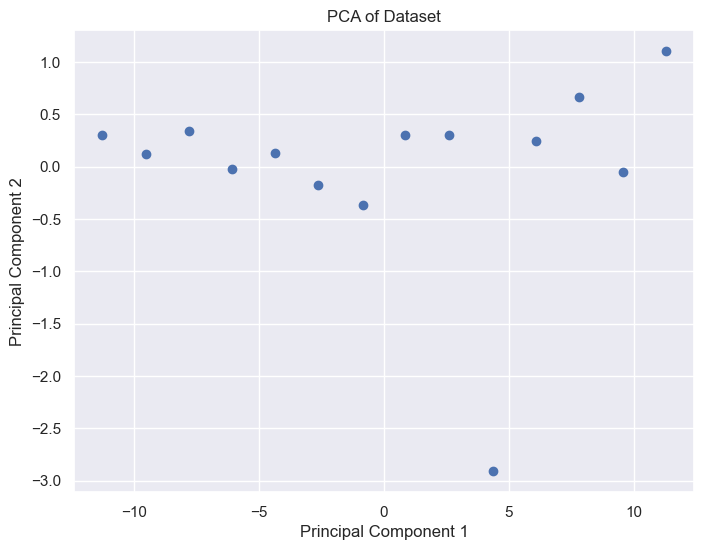

In [11]:
# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)

plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.grid(True)
plt.show()

In [ ]:
# List columns starting with 'food_' or 'snacks_'
target_columns = [col for col in df.columns if col.startswith(('carbon_', 'tc_'))]
print(target_columns)

target_columns_avg = [col for col in df.columns if 'average' in col]
print(target_columns_avg)

['carbon_year', 'carbon_Afghanistan', 'carbon_Akrotiri and Dhekelia', 'carbon_Albania', 'carbon_Algeria', 'carbon_Andorra', 'carbon_Angola', 'carbon_Anguilla', 'carbon_Antigua and Barbuda', 'carbon_Argentina', 'carbon_Armenia', 'carbon_Aruba', 'carbon_Australia', 'carbon_Austria', 'carbon_Azerbaijan', 'carbon_Bahamas', 'carbon_Bangladesh', 'carbon_Barbados', 'carbon_Belarus', 'carbon_Belgium', 'carbon_Belize', 'carbon_Benin', 'carbon_Bermuda', 'carbon_Bhutan', 'carbon_Bolivia', 'carbon_Bonaire, Sint Eustatius and Saba', 'carbon_Bosnia and Herzegovina', 'carbon_Botswana', 'carbon_Brazil', 'carbon_British Virgin Islands', 'carbon_Brunei', 'carbon_Bulgaria', 'carbon_Burkina Faso', 'carbon_Burundi', 'carbon_Cambodia', 'carbon_Cameroon', 'carbon_Canada', 'carbon_Caspian Sea', 'carbon_Cayman Islands', 'carbon_Central African Republic', 'carbon_Chad', 'carbon_Chile', 'carbon_China', 'carbon_Colombia', 'carbon_Comoros', 'carbon_Costa Rica', 'carbon_Croatia', 'carbon_Cuba', 'carbon_Curaçao', 'c

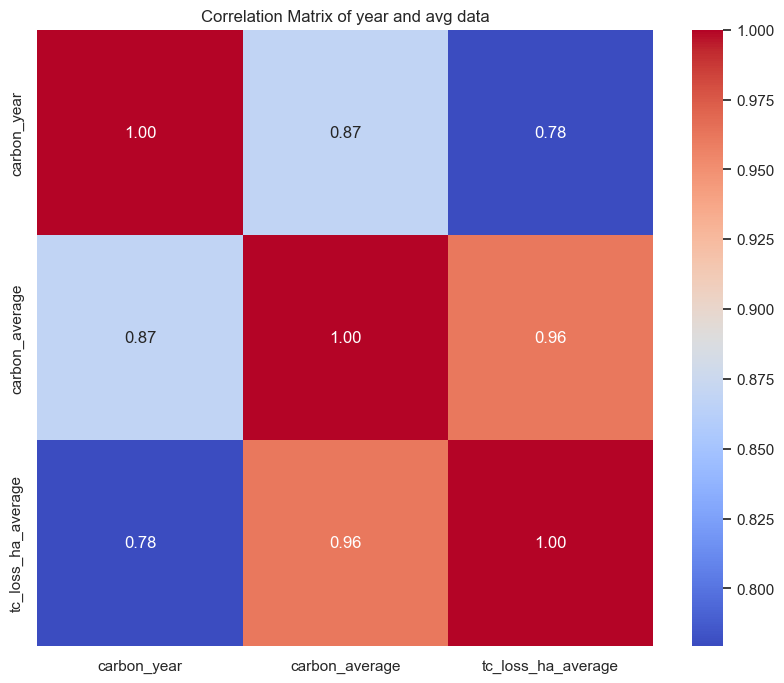

In [14]:
# year and tc df
year_avg_df = df[[col for col in df.columns if col.startswith('carbon_year') or 'average' in col]]

corr_matrix = year_avg_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of year and avg data')
plt.show()


In [15]:
print(year_avg_df)

    carbon_year  carbon_average  tc_loss_ha_average
0          2001        0.005504            0.006603
1          2002        0.006880            0.008135
2          2003        0.005736            0.007157
3          2004        0.008489            0.009843
4          2005        0.008405            0.008948
5          2006        0.008035            0.008726
6          2007        0.008621            0.009091
7          2008        0.008491            0.009202
8          2009        0.008457            0.008401
9          2010        0.009142            0.009173
10         2011        0.008609            0.008692
11         2012        0.011247            0.011635
12         2013        0.009271            0.010207
13         2014        0.011667            0.011734


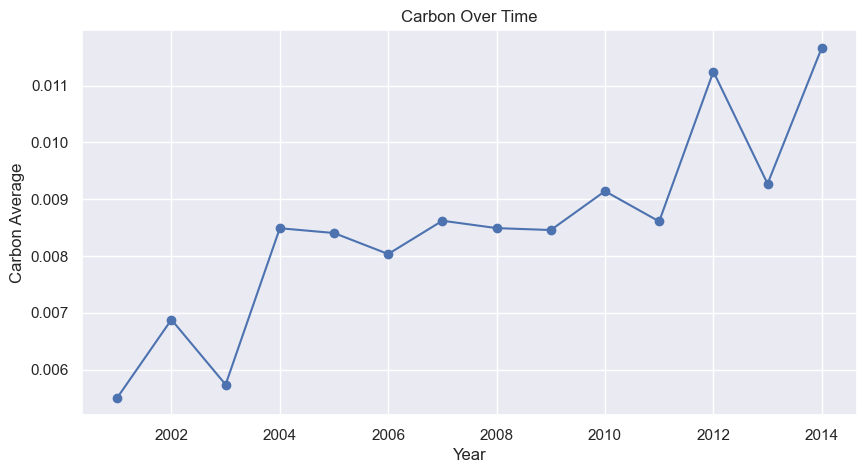

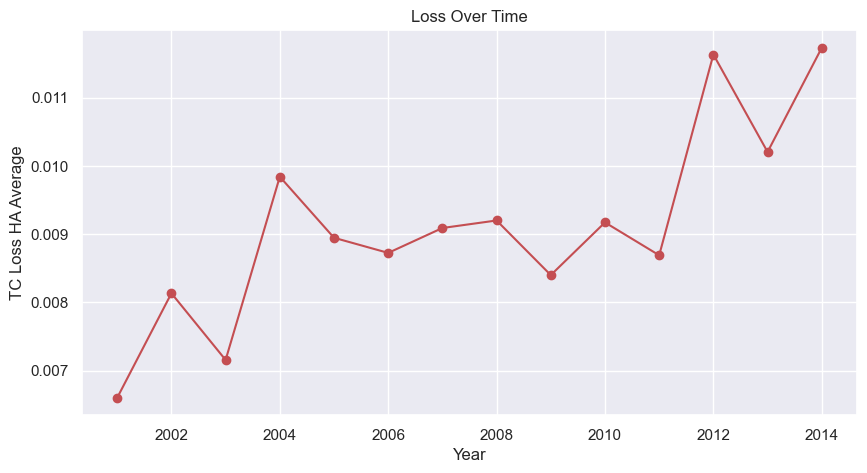

In [18]:
# Plotting carbon_average
plt.figure(figsize=(10, 5)) 
plt.plot(df['carbon_year'], df['carbon_average'], marker='o', color='b', linestyle='-')
plt.title('Carbon Over Time')
plt.xlabel('Year')  
plt.ylabel('Carbon Average') 
plt.grid(True)  
plt.show() 

# Plotting tc_loss_ha_average
plt.figure(figsize=(10, 5))  
plt.plot(df['carbon_year'], df['tc_loss_ha_average'], marker='o', color='r', linestyle='-')
plt.title('Loss Over Time') 
plt.xlabel('Year')  
plt.ylabel('TC Loss HA Average')  
plt.grid(True)  
plt.show() 